In order to operate GraphGrammar a user have to build node and rule vocabularies the instances of the NodeVocabulary and RuleVocabulary classes and fill them with nodes and rules for the graph. This tutorial provides the description of the creating nodes and rules process. Note that graph grammar is not necessary applied to mech building, graphs and rules can be considered at abstract level

Before starting to build your vocabularies import all necessary libs standard and from the `rostok` package

In [24]:
from cmath import sqrt

import numpy as np


from rostok.graph_grammar.node import ROOT, GraphGrammar
from rostok.graph_grammar.node_vocabulary import NodeVocabulary
from rostok.graph_grammar.rule_vocabulary import RuleVocabulary
from rostok.graph_grammar.graph_utils import plot_graph

NodeVocabulary is a class that contains all nodes of a graph grammar and provides some functionality.

First step is to create an instance of the class NodeVocabulary and add the imported node ROOT to your vocabulary, the ROOT node is special starting point that have to be in any node vocabulary in this framework.

In our approach there are two types of nodes terminal and non-terminal. The non-terminal nodes describe a part of the robot in general without physical properties, for example node "J" represents joints. The nodes are the objects of the class Node and non-terminal nodes actually have only one attribute - label. In this tutorial all nodes will have only labels, because we consider them to be abstract.

In [25]:
node_vocab = NodeVocabulary()
node_vocab.add_node(ROOT)
node_vocab.create_node("A")
node_vocab.create_node("B")
node_vocab.create_node("C")
node_vocab.create_node("D")

node_vocab.create_node("A1", is_terminal=True)
node_vocab.create_node("B1", is_terminal=True)
node_vocab.create_node("C1", is_terminal=True)

Now all nodes are set and we can move to the creation of rules. At first create an instance of the RuleVocabulary class. 
To create a rule one must set the node that should be replaced, the new nodes, which nodes should be used to connect parent and child nodes of the replaced node, and connections between new nodes.  

1. ROOT rule is has to be applied first, it turns special node ROOT into node A  
2. First_Rule is how one extends the graph adding new nodes, the replaced node and one of the new nodes are the same, therefore one can use this rule several time.  
3. Then we create what is called terminal rules - they either transform non-terminal nodes into some of its terminal(physical) representation, or remove the node.  


In [26]:
rule_vocab = RuleVocabulary(node_vocab)
rule_vocab.create_rule("ROOT", ["ROOT"], ["A"], 0, 0)
rule_vocab.create_rule("First_Rule", ["A"], ["B", "C","A"], 0, 2, [(0, 1),(1,2)])
rule_vocab.create_rule("AT", ["A"], ["A1"], 0, 0)
rule_vocab.create_rule("BT", ["B"], ["B1"], 0, 0)
rule_vocab.create_rule("CT", ["C"], ["C1"], 0, 0)
rule_vocab.create_rule("AD", ["A"], [], 0, 0)

`RuleVocabulary` has several function to help in visualizing the rules 

ROOT: ROOT ==> ['A'] []
First_Rule: A ==> ['B', 'C', 'A'] [(0, 1), (1, 2)]
AT: A ==> ['A1'] []
BT: B ==> ['B1'] []
CT: C ==> ['C1'] []
AD: A ==> [] []



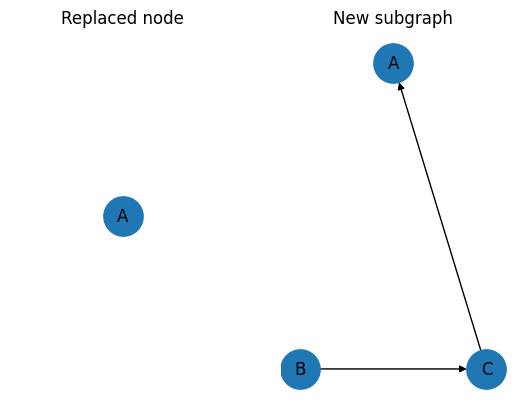

In [27]:
print(rule_vocab)
rule_vocab.rule_vis("First_Rule")

To start building graph one have to create a `GraphGrammar` object and use apply rule function. Apply rule function expects the Rule object that can be obtained from rule vocabulary using `get_rule` and name of a rule  
`RuleVocabulary`  can provide a list of rules that can be applied to the current graph.  

In [28]:
G = GraphGrammar()
rule_vocab.get_list_of_applicable_rules(G)



['ROOT']

At first step only ROOT rule is applicable.  
After that we can apply three rules to the new graph.

In [29]:
G.apply_rule(rule_vocab.get_rule("ROOT"))
rule_vocab.get_list_of_applicable_rules(G)

['First_Rule', 'AD', 'AT']

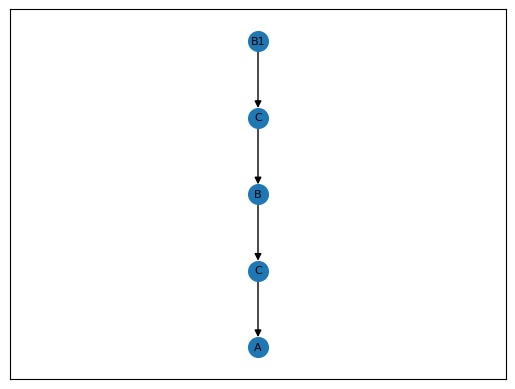

In [30]:

G.apply_rule(rule_vocab.get_rule("First_Rule"))
G.apply_rule(rule_vocab.get_rule("First_Rule"))
G.apply_rule(rule_vocab.get_rule("BT"))
plot_graph(G)


If graph have several nodes with the same node a rule that should replace this node will be applied to the node closest to the start of the graph, considering all our graphs have simple tree topology. 

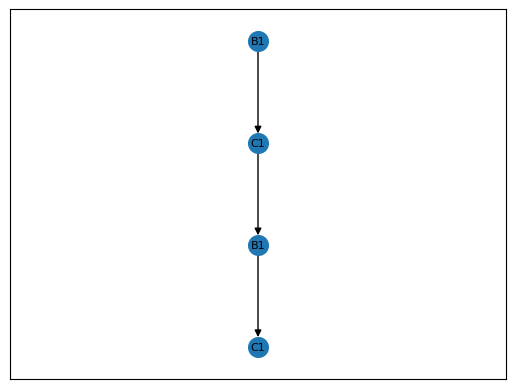

[]

In [32]:
G.apply_rule(rule_vocab.get_rule("BT"))
G.apply_rule(rule_vocab.get_rule("CT"))
G.apply_rule(rule_vocab.get_rule("CT"))
G.apply_rule(rule_vocab.get_rule("AD"))
plot_graph(G)
rule_vocab.get_list_of_applicable_rules(G)